IMPORT PACKAGE

In [14]:
## import data library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## metode
import statsmodels.api as sm
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR

## RMSE
from sklearn.metrics import mean_squared_error

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
filename = '/content/sample_data/alarmtsel.csv'

In [17]:
data=pd.read_csv(filename)

In [18]:
data.head()

,Date,TSEL-OTHERS
0,1,6008
1,2,5537
2,3,5595
3,4,6223
4,5,486


In [21]:
data.describe()

,Date,TSEL-OTHERS
count,31.000000,31.000000
mean,16.000000,4644.870968
std,9.092121,1610.815709
min,1.000000,364.000000
25%,8.500000,3951.000000
50%,16.000000,4531.000000
75%,23.500000,5927.000000
max,31.000000,7134.000000


In [22]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Date         31 non-null     int64
 1   TSEL-OTHERS  31 non-null     int64
dtypes: int64(2)
memory usage: 624.0 bytes


In [23]:
data.dtypes

Date           int64
TSEL-OTHERS    int64
dtype: object

In [24]:
data.isna().sum()

Date           0
TSEL-OTHERS    0
dtype: int64

In [25]:
data.corr()

,Date,TSEL-OTHERS
Date,1.000000,0.152754
TSEL-OTHERS,0.152754,1.000000


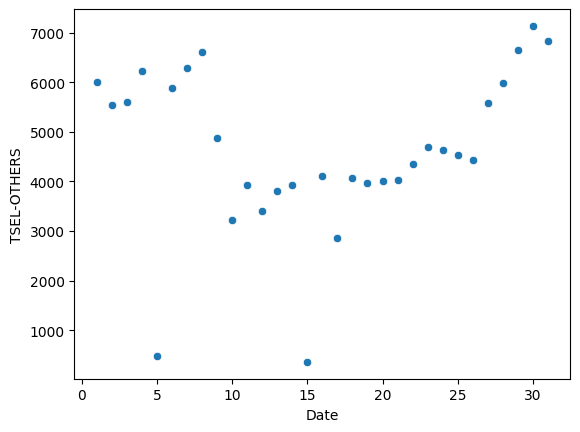

In [30]:
sns.scatterplot(data = data, x = 'Date', y = 'TSEL-OTHERS')
plt.show()

In [31]:
x = data[['Date']]
y = data['TSEL-OTHERS']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=70)

Ordinary Least Squared METHOD

In [33]:
ols = sm.OLS(X_train, y_train)
results = ols.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   Date   R-squared (uncentered):                   0.687
Model:                            OLS   Adj. R-squared (uncentered):              0.672
Method:                 Least Squares   F-statistic:                              43.98
Date:                Sun, 30 Apr 2023   Prob (F-statistic):                    1.86e-06
Time:                        16:19:14   Log-Likelihood:                         -79.077
No. Observations:                  21   AIC:                                      160.2
Df Residuals:                      20   BIC:                                      161.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [34]:
y_pred_ols = results.predict(X_test)

In [35]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)

Parameters:  TSEL-OTHERS    0.003214
dtype: float64
R2:  0.6874157229626828


Bayes Ridge Regression Method

In [36]:
bayes_model = BayesianRidge()

In [37]:
bayes_model.fit(X_train, y_train)

BayesianRidge()

In [38]:
y_pred_bayes = bayes_model.predict(X_test)

Support Vector Machine Regressor Method

In [39]:
svm_model = SVR(kernel='rbf')

In [40]:
svm_model.fit(X_train, y_train)

SVR()

In [41]:
y_pred_svm = svm_model.predict(X_test)

RMSE for each model

In [42]:
ols = mean_squared_error(y_test, y_pred_ols, squared=False)
svm = mean_squared_error(y_test, y_pred_svm, squared=False)
bayes = mean_squared_error(y_test, y_pred_bayes, squared=False)

In [43]:
print('Ordinary Least Square RMSE :', ols)
print('Bayes Ridge RMSE :', bayes)
print('SVM Regressor RMSE :', svm)

Ordinary Least Square RMSE : 5082.325256671672
Bayes Ridge RMSE : 1378.993986902158
SVM Regressor RMSE : 1348.6116352345568


Smallest RMSE is on SVM Regressor with RMSE 1348.6116